# Handwritten digits recognition (using Convolutional Neural Network)

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on **GitHub**<br/><br/>
> - ▶️ **Interactive Demo**: [try this model and other machine learning experiments in action](https://trekhleb.github.io/machine-learning-experiments/)

## Experiment overview

In this experiment we will build a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN) model using [Tensorflow](https://www.tensorflow.org/) to recognize handwritten digits.

A **convolutional neural network** (CNN, or ConvNet) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

![digits_recognition_cnn.png](../../demos/src/images/digits_recognition_cnn.png)

## Import dependencies

- [tensorflow](https://www.tensorflow.org/) - for developing and training ML models.
- [matplotlib](https://matplotlib.org/) - for plotting the data.
- [seaborn](https://seaborn.pydata.org/index.html) - for plotting confusion matrix.
- [numpy](https://numpy.org/) - for linear algebra operations.
- [pandas](https://pandas.pydata.org/) - for displaying training/test data in a table.
- [math](https://docs.python.org/3/library/math.html) - for calculating square roots etc.
- [datetime](https://docs.python.org/3.8/library/datetime.html) - for generating a logs folder names.

In [32]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform   ## The platform module in Python provides functions that access information of the underlying platform (operating system).

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.12.12
Tensorflow version: 2.19.0
Keras version: 3.10.0


## Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [34]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [35]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [36]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


## Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [37]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows:

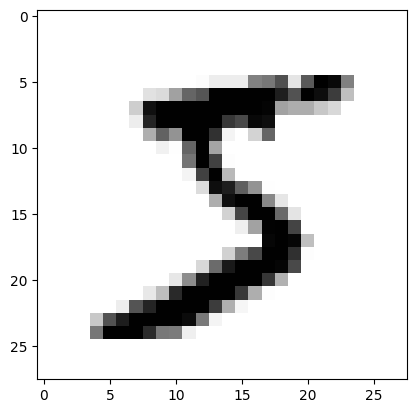

In [38]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [39]:
x_train_with_chanels = x_train.reshape(
    x_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
    )
x_test_with_chanels = x_test.reshape(
    x_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
    )

In [40]:
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels /255

In [41]:
x_train_normalized[0][18]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.18039216],
       [0.50980392],
       [0.71764706],
       [0.99215686],
       [0.99215686],
       [0.81176471],
       [0.00784314],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

In [82]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer = tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=3, # Changed kernel size to 3
    filters=24,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer = tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2,2),
    strides=(2,2)
))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units = 128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()

))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 24, 24, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 12, 12, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 8, 8, 16)       │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 2, 2, 24)       │         3,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 1, 1, 24)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,394 (44.51 KB)

 Trainable params: 11,394 (44.51 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
#compile the model

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [85]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8024 - loss: 0.6143 - val_accuracy: 0.9623 - val_loss: 0.1199
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9662 - loss: 0.1118 - val_accuracy: 0.9774 - val_loss: 0.0672
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9782 - loss: 0.0700 - val_accuracy: 0.9816 - val_loss: 0.0596
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9825 - loss: 0.0582 - val_accuracy: 0.9830 - val_loss: 0.0522
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9855 - loss: 0.0455 - val_accuracy: 0.9868 - val_loss: 0.0389
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9875 - loss: 0.0421 - val_accuracy: 0.9863 - val_loss: 0.0402
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9893 - loss: 0.0356 - val_accuracy: 0.9877 - val_loss: 0.0385
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 17ms/step - accuracy: 0.9900 -

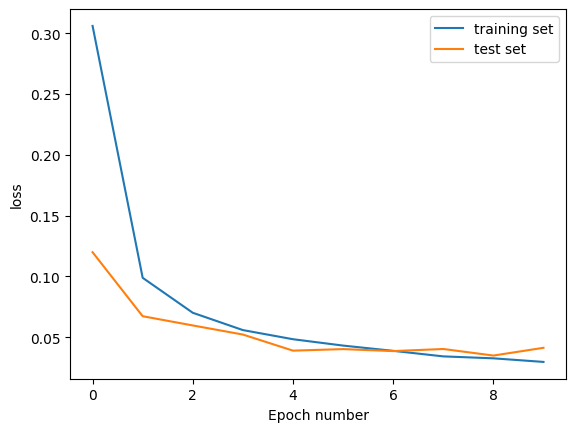

In [86]:
plt.xlabel('Epoch number')
plt.ylabel('loss')
plt.plot(training_history.history['loss'],label='training set')
plt.plot(training_history.history['val_loss'],label='test set')
plt.legend()

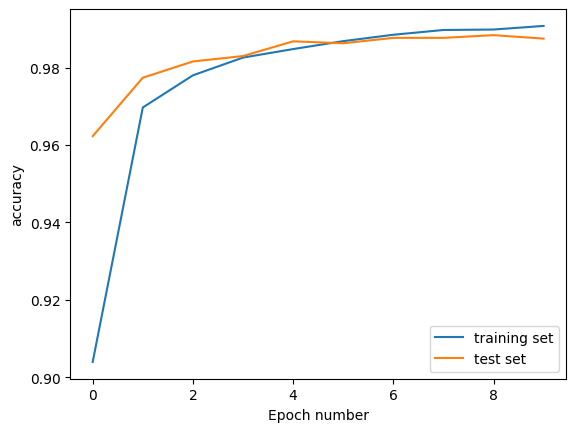

In [87]:
plt.xlabel('Epoch number')
plt.ylabel('accuracy')
plt.plot(training_history.history['accuracy'],label='training set')
plt.plot(training_history.history['val_accuracy'],label='test set')
plt.legend()

In [ ]:
# Evaluate model accuracy

In [88]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [57]:
print('Training loss:', train_loss)
print('Training accuracy:', train_accuracy)

Training loss: 0.007124593015760183
Training accuracy: 0.9977666735649109


In [ ]:
# savethe model


In [62]:
model_name='digits_recognition_cnn.h5'
model.save(model_name, save_format ='h5')

In [63]:

loaded_model=tf.keras.models.load_model(model_name)

In [64]:
predictions_all_labels = loaded_model.predict([x_test_normalized])

 10/313 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step    

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_5
Received: inputs=('Tensor(shape=(32, 28, 28, 1))',)
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_5
Received: inputs=('Tensor(shape=(None, 28, 28, 1))',)
  warnings.warn(msg)


In [66]:
print('predictions_all:', predictions_all_labels.shape)

predictions_all: (10000, 10)


In [67]:
pd.DataFrame(predictions_all_labels)

,0,1,2,3,4,5,6,7,8,9
0,1.679240e-37,1.644460e-26,2.625833e-27,4.405017e-26,1.137572e-20,1.022908e-26,0.000000e+00,9.999999e-01,6.104941e-35,1.560294e-22
1,7.183412e-16,2.467078e-22,9.999999e-01,8.027888e-27,2.079174e-32,8.034316e-36,4.382161e-24,1.730832e-24,8.641373e-25,0.000000e+00
2,2.028680e-16,9.999999e-01,2.004181e-16,4.990752e-21,6.849138e-13,6.415245e-14,6.118295e-14,5.169034e-13,5.187498e-15,1.953578e-15
3,9.999999e-01,1.364269e-31,9.464139e-28,2.232907e-27,1.695639e-25,3.105229e-22,7.535765e-16,8.827008e-34,1.707450e-20,3.532610e-27
4,4.701706e-27,2.428585e-17,2.647937e-24,6.809083e-32,9.999999e-01,3.155345e-29,9.237858e-27,2.324282e-21,2.819085e-20,1.604469e-12
...,...,...,...,...,...,...,...,...,...,...
9995,1.584661e-20,2.002872e-18,9.999999e-01,6.088138e-24,7.141382e-33,0.000000e+00,1.502456e-29,3.724361e-23,1.182233e-28,8.174102e-38
9996,4.288841e-30,2.542702e-23,1.711452e-22,9.999999e-01,1.818119e-27,5.930587e-14,2.001912e-38,5.288575e-25,1.272367e-22,5.196866e-23
9997,0.000000e+00,9.405286e-30,0.000000e+00,0.000000e+00,9.999999e-01,0.000000e+00,0.000000e+00,7.250704e-29,1.023814e-26,7.698216e-38
9998,3.164558e-27,1.977422e-28,1.319722e-28,1.462904e-13,2.598353e-34,9.999999e-01,2.007478e-25,4.617884e-32,5.385938e-16,9.775819e-28


In [69]:
predictions = np.argmax(predictions_all_labels, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

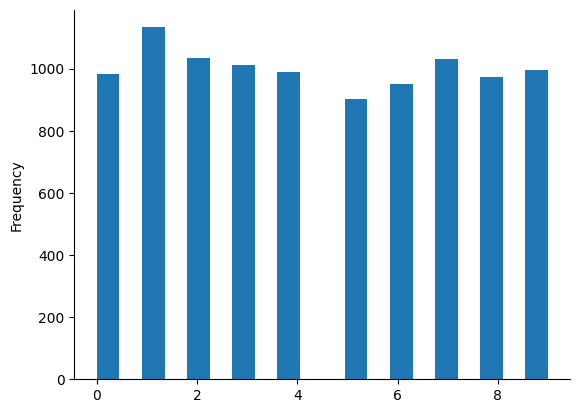

In [70]:
from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [72]:
print(predictions[0])

7


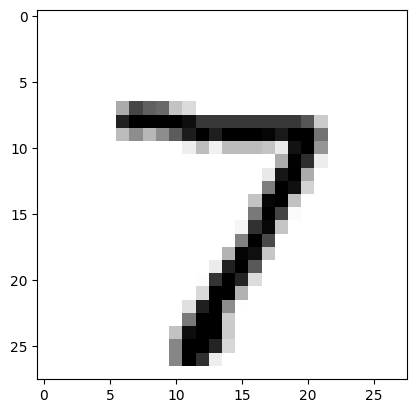

In [73]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.